#Descision tree regresion
CART
CLASSIFIACTION TREE
REGRESSION TREE


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

from joblib import dump,load
import plotly.express as px

In [20]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/diamond_pricing.csv")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089


In [21]:
#first visulaisation
px.scatter_3d(df,x='Paleonium',y='Pressure',z='Price')

In [22]:
X =df[['Paleonium','Pressure']]
y =df['Price']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1)

In [23]:
###algo insatance and fit
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [24]:
print("score:",model.score(xtest,ytest) *100)
pred=model.predict(X)
print("mse",mean_squared_error(y,pred))
print("mse",mean_absolute_error(y,pred))



score: 95.71527473866503
mse 3981.5941614841904
mse 21.080338619857


<AxesSubplot:ylabel='Density'>

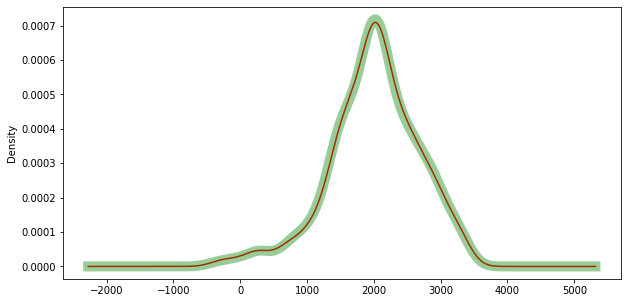

In [28]:
df['p1']= pred
ax=df['Price'].plot(kind='kde', color='red',figsize=(10,5))
df['p1'].plot(kind='kde',ax=ax,color='green',alpha=.4,linewidth=10)

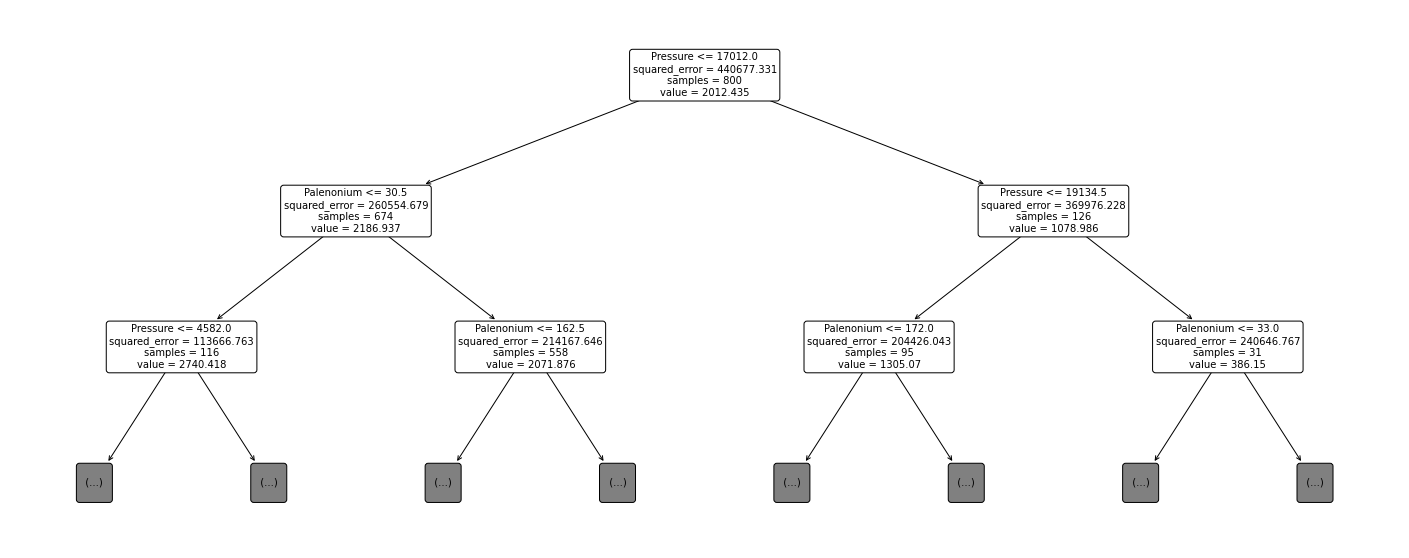

In [40]:
plt.figure(figsize=(25,10))
plot_tree(model,max_depth=2,fontsize=10,feature_names=['Palenonium','Pressure'],rounded=True)
plt.show()

In [29]:
dump(model,'new_basic_diamond')

['new_basic_diamond']